# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
#import api_keys
api_key = "b0879a8fd831712c26e38acaffe8983a"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(total_cities)

622


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build data frames
name=[]
lon=[]
lat=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
print("Beginning Data Retrieval")
print("-----------------------------")
record=0
#set = 1    
# loop through cities, make API request, and append desired results
for city in cities:
    
    response = requests.get(query_url + city).json()
    #print(json.dumps(response, indent=2, sort_keys=True))
    record = record + 1
    try:
        print(f"Processing Record {record} of {total_cities}  | {city}")
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
#        if city == response['name']:
#            set = set + 1
    except (KeyError, IndexError):
        print(f"City not found. Skipping...... {city}.")
        record = record - 1
        
#print("-----------------------------")       
#print("Beginning Retrieval Complete")
#print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 622  | paka
Processing Record 2 of 622  | ugoofaaru
Processing Record 3 of 622  | nanortalik
Processing Record 4 of 622  | pachino
Processing Record 5 of 622  | hasaki
Processing Record 6 of 622  | miraflores
Processing Record 7 of 622  | portland
Processing Record 8 of 622  | rumoi
Processing Record 9 of 622  | khatanga
Processing Record 10 of 622  | cherskiy
Processing Record 11 of 622  | palana
Processing Record 12 of 622  | ca mau
Processing Record 13 of 622  | talnakh
Processing Record 14 of 622  | kodiak
Processing Record 15 of 622  | vichy
Processing Record 16 of 622  | korla
City not found. Skipping...... korla.
Processing Record 16 of 622  | ponta do sol
Processing Record 17 of 622  | vaini
Processing Record 18 of 622  | barentsburg
City not found. Skipping...... barentsburg.
Processing Record 18 of 622  | taolanaro
City not found. Skipping...... taolanaro.
Processing Record 18 of 622  | sechura
Proc

Processing Record 173 of 622  | guerrero negro
Processing Record 174 of 622  | hofn
Processing Record 175 of 622  | inuvik
Processing Record 176 of 622  | namibe
Processing Record 177 of 622  | ninghai
Processing Record 178 of 622  | clyde river
Processing Record 179 of 622  | half moon bay
Processing Record 180 of 622  | virginia beach
Processing Record 181 of 622  | nefteyugansk
Processing Record 182 of 622  | mao
Processing Record 183 of 622  | sangueya
Processing Record 184 of 622  | saint-philippe
Processing Record 185 of 622  | vikindu
Processing Record 186 of 622  | wagar
Processing Record 187 of 622  | aleksandrovsk-sakhalinskiy
Processing Record 188 of 622  | port lincoln
Processing Record 189 of 622  | ancud
Processing Record 190 of 622  | saskylakh
Processing Record 191 of 622  | brainerd
Processing Record 192 of 622  | mataram
Processing Record 193 of 622  | bijie
Processing Record 194 of 622  | boyolangu
Processing Record 195 of 622  | madang
Processing Record 196 of 622  

Processing Record 334 of 622  | thompson
Processing Record 335 of 622  | san ramon
Processing Record 336 of 622  | pangnirtung
Processing Record 337 of 622  | suntar
Processing Record 338 of 622  | fuente de oro
Processing Record 339 of 622  | grand river south east
City not found. Skipping...... grand river south east.
Processing Record 339 of 622  | rock sound
Processing Record 340 of 622  | bonthe
Processing Record 341 of 622  | naze
Processing Record 342 of 622  | srivardhan
Processing Record 343 of 622  | getulio vargas
Processing Record 344 of 622  | grand gaube
Processing Record 345 of 622  | mocuba
Processing Record 346 of 622  | teguise
Processing Record 347 of 622  | yulara
Processing Record 348 of 622  | coruripe
Processing Record 349 of 622  | huajuapan
City not found. Skipping...... huajuapan.
Processing Record 349 of 622  | hokitika
Processing Record 350 of 622  | rawson
Processing Record 351 of 622  | batagay-alyta
Processing Record 352 of 622  | calella
Processing Recor

Processing Record 490 of 622  | mount isa
Processing Record 491 of 622  | jega
Processing Record 492 of 622  | shar
Processing Record 493 of 622  | chilca
Processing Record 494 of 622  | la libertad
Processing Record 495 of 622  | george
Processing Record 496 of 622  | daru
Processing Record 497 of 622  | kupang
Processing Record 498 of 622  | kralendijk
Processing Record 499 of 622  | marks
Processing Record 500 of 622  | cayenne
Processing Record 501 of 622  | diamantino
Processing Record 502 of 622  | sokoni
Processing Record 503 of 622  | farafangana
Processing Record 504 of 622  | nehe
Processing Record 505 of 622  | turayf
Processing Record 506 of 622  | kirakira
Processing Record 507 of 622  | enshi
Processing Record 508 of 622  | pouebo
Processing Record 509 of 622  | maragogi
Processing Record 510 of 622  | arica
Processing Record 511 of 622  | azanka
Processing Record 512 of 622  | cedar city
Processing Record 513 of 622  | port keats
Processing Record 514 of 622  | biak
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dataframe for city information

city_dict = {"City": name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,"Lat": lat,
            "Lon": lon,"Max Temp": max_temp,"Wind Speed": wind_speed}
            
city_df = pd.DataFrame(city_dict)
city_df.head()

#save to csv file
city_df.to_csv('output_data/cities.csv')

In [6]:
city_count = city_df.count()
print(city_count)

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lon           563
Max Temp      563
Wind Speed    563
dtype: int64


#### Latitude vs. Temperature Plot

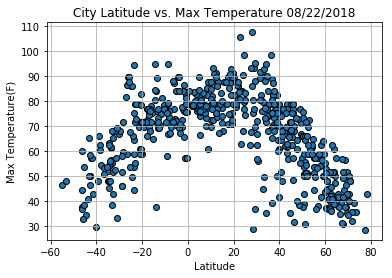

In [7]:
# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature 08/22/2018")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

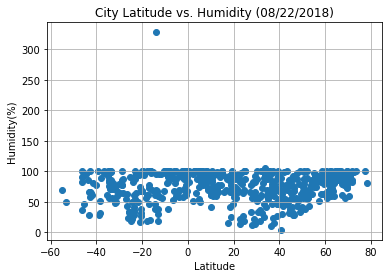

In [8]:
# Calculate Humidity
city_humidity = city_df[('Humidity')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_humidity, marker="o")
plt.title("City Latitude vs. Humidity (08/22/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

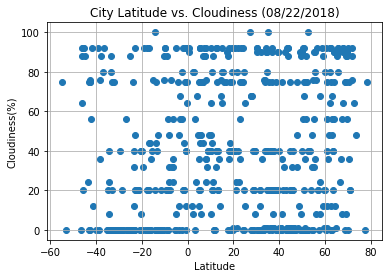

In [9]:
# Calculate cloudiness
city_cloudiness = city_df[('Cloudiness')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_cloudiness, marker="o")
plt.title("City Latitude vs. Cloudiness (08/22/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

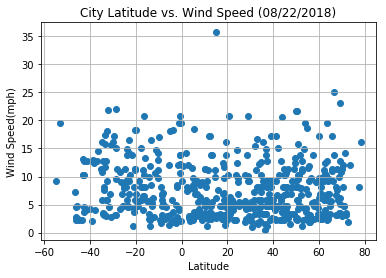

In [10]:
# Calculate Wind Speed
city_wind_speed = city_df[('Wind Speed')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_wind_speed, marker="o")
plt.title("City Latitude vs. Wind Speed (08/22/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")

# Show plot
plt.show()